# Exercise 1

We first load a dataset and examine its dimensions.

In [57]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [58]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

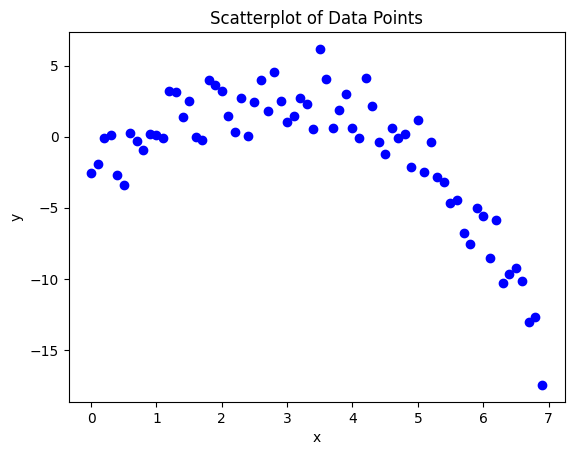

In [59]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
plt.scatter(xy_data[:, 0], xy_data[:, 1], color='blue', marker='o', label='Data points')
plt.title('Scatterplot of Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [60]:
def polyreg(data_matrix, k):
    x = data_matrix[:, 0]
    y = data_matrix[:, 1]
    N = np.shape(data_matrix)[0]
    k = k if k < N else N - 1
    X = []
    for i in range(k + 1):
        X.append(x ** i)
    X = np.column_stack(tuple(X))

    # Computing the coefficient vector beta* using least squares formula
    beta_values = np.linalg.lstsq(X, y, rcond=None)[0]
    fit = np.column_stack((x, X.dot(beta_values)))
    residuals = y - fit[:, 1]
    return beta_values, fit, residuals
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    

Use the tests below to check the outputs of the function you have written:

In [61]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
print(beta_test) 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals
print(beta_test)

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

[ 2. -7.  3.]
[3.1]


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

R^2 for k=2: 0.8876297774918224
R^2 for k=3: 0.9005356474205022
R^2 for k=4: 0.9013044535638857
SSE for k=2: 172.1810252898855
SSE for k=3: 152.40580488915808
SSE for k=4: 151.22778969027124


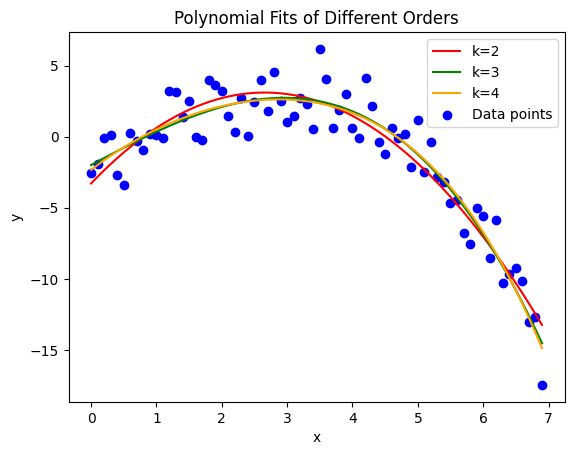

In [62]:
#Your code here
def R_squared(fit, data):
    # Your code here
    # The function should return the R^2 value
    return 1 - np.sum((data-fit) ** 2) / np.sum((data - np.mean(data)) ** 2)
def SSE(fit, data):
    # Your code here
    # The function should return the sum of squared errors
    return np.sum((data-fit) ** 2)

fit_2 = polyreg(xy_data, k=2)[1]
fit_3 = polyreg(xy_data, k=3)[1]
fit_4 = polyreg(xy_data, k=4)[1]


print('R^2 for k=2:', R_squared(fit_2[:, 1], xy_data[:, 1]))
print('R^2 for k=3:', R_squared(fit_3[:, 1], xy_data[:, 1]))
print('R^2 for k=4:', R_squared(fit_4[:, 1], xy_data[:, 1]))
print('SSE for k=2:', SSE(fit_2[:, 1], xy_data[:, 1]))
print('SSE for k=3:', SSE(fit_3[:, 1], xy_data[:, 1]))
print('SSE for k=4:', SSE(fit_4[:, 1], xy_data[:, 1]))

plt.plot(fit_2[:, 0], fit_2[:, 1], color='red', label='k=2')
plt.plot(fit_3[:, 0], fit_3[:, 1], color='green', label='k=3')
plt.plot(fit_4[:, 0], fit_4[:, 1], color='orange', label='k=4')
plt.scatter(xy_data[:, 0], xy_data[:, 1], color='blue', marker='o', label='Data points')
plt.title('Polynomial Fits of Different Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



 #### State which model you choose and briefly justify your choice.
 
 
The higher order polynomial, k=4 was able to capture the features better with the highest R^2 value and lowest SSE.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

Mean of residuals =  -0.0 Variance of residuals =  2.16


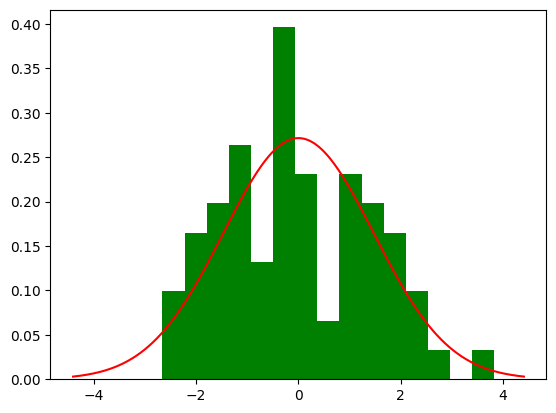

In [63]:
#Your code here
resid_lin = polyreg(xy_data, k=4)[2]  # residuals of the linear fit
print('Mean of residuals = ', np.round(np.mean(resid_lin), 5), 'Variance of residuals = ', 
      np.round(np.var(resid_lin), 3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_lin, bins=15, density=True, facecolor='green')

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(resid_lin)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()

